<h1><center>Algorithm: Merge Sort</center></h1>
### Motivation:

* Good introduction to ***divide and conquer*** techniques
* Works recursively by splitting array
* Asserting that it works better than insertion sort, selection sort, or bubble sort

### Big-picture Example:
* **Input:** Array of n numbers, sorted

* **Output:** Same numbers, sorted in increasing order

![Merge Sort Example](images/merge_sort_1.png)

***
## Pseudocode for Merge
***Motivation***: Pseudocode for merger portion of merge sort - ignoring recursive portion

In [ ]:
C = output [length = n]  
A = 1st sorted array [n/2]  
B = 2nd sorted array [n/2]  
i, j = 0,0

In [ ]:
for k = 1 to n:  
    if A(i) < B(j):  
        C(k) = A(i)  
        i++
    else: #B(j) < A(i)
        C(k) = B(j)
        j++

**Note**: This ignores end cases (what happens if subarrays are different lengths, for example

***
## Real Code for Merge Sort
***Motivation***: Python implementation of recursive merge sort

### Merge Sort Algorithm:

In [1]:
def merge_sort(alist):
    if len(alist) <= 1:
        return alist

    mid = len(alist)//2
    return merge(merge_sort(alist[:mid]), merge_sort(alist[mid:]))

def merge(L1, L2):
    i, j, Output = 0, 0, []

    while i < len(L1) and j < len(L2):
        if L1[i] < L2[j]:
            Output.append(L1[i]) 
            i += 1
        else:
            Output.append(L2[j])
            j += 1

    Output += L1[i:]
    Output += L2[j:]

    return Output

In [2]:
alist = [8, 1, 7, 2, 6, 3, 5, 4, 9]
merge_sort(alist)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

***
## Merge Sort Running Time Analysis
***Motivation***: Running time of merge sort on an array of *n* numbers


### Merge Step

1. From psudeocode above, each pass through the `for` loop has roughly 6 operations

2. The `for` loop will execute *n* times (where *n* is the length of the array)


* **Upshot**: Total number of operations is *6n*



### Recursive Steps

1. The depth of the recursion tree is $log_2n+1$   
    ***Note***: This is the number of levels. There is the initial case *n* followed by $\log_2n$ recurses


2. At each level of the recursion tree there are $2^j$ subproblems each with size $n / 2^j$ 


3. Total operations per level: $$2^j * 6(n/2^j) => 6n$$


4. Total operations overall is then (worst-case):

$$6n(log_2n +1) => 6n log_2 n + 6n => O(n log_2 n)$$

***
## Guiding Principles for Algorithm Analysis

### 1) Worst-case Analysis
***Idea***: Our running time bound holds for every input of length *n*

* This is particularly appropriate for "general-pupose" routines


### 2) Lower-order Terms
***Idea***: We won't pay much attention to constant factors and lower order terms


**Justifications**:
1. It's just easier says Tim
2. Constants depend greatly on architecture - compiler/programmer/etc
3. Lose very little predictive power


### 3) Asymptotic Analysis
***Idea***: Focus on running time for large input sizes n - reaching an asymptotic value

**Example**: 
* $6n log_2n + 6n$ is "better than" $1/2 n^2$ - but really, it's only better for sufficiently large *n*


* At smaller values of *n*, it really doesn't matter what algorithm you use

### What's the goal?
***Holy Grail***: Linear running time or something close to it (i.e. $O(n)$)

***
# <center>Concept: Asymptotic Analysis ("Big-Oh")</center>

### Motivation

1. Vocabulary for the design and analysis of algorithms  
    * "Big-oh" notation
    
    
2. "Sweet spot" for high-level reasoning about algorithms


3. *Coarse* enough to suppress architecture/language/compiler-dependent details.


4. *Sharp* enough to make useful comparisons between different algorithms, especially on large inputs (e.g. sorting functions, or integer multiplication)


**High-level Idea**: Suppress constant factors and lower-order terms

***
### Example (from previous)
We can equate the following:

$$6n log_2n + 6n => n log  n$$

Meaning the running time is 

$$O(n log  n)$$




***
## Asymptotic Analysis Examples

### Example 1 - One Loop

In [ ]:
# Given 1 array A
for i in range(len(A)):
    if A[i] == t:
        # do something

***Maximum number or lines run***: n

***Analysis***: $O(n)$ - linear time

### Example 2 - Two Loops

In [ ]:
# Give 2 arrays A, length n and B, length m
for i in range(len(A)):
    if A[i] == t:
        # do something 
        
for i in range(len(B)):
    if B[i] == t:
        # do something else

***Maximum number or lines run***: n*m

***Analysis***: $O(nm) => O(n)$ - linear time

### Example 3 - Two Nested Loops

In [ ]:
# Given arrays A and B of length n
for i = 1 to n:
    for j = 1 to n:
        if A[i] == A[j] return True
return False

***Maximum number or lines run***: $n^2$

***Analysis***: $O(n^2)$ - quadratic time

### Example - Two Nested Loops (II)

In [ ]:
# Given an array A of length n
for i = 1 to n:
    for j = i + l to n:
        if A[i] == A[j] return True
return False

***Maximum number or lines run***: $1/2 *n(n - 1)$

***Analysis***: $O(n^2)$ - quadratic time (ignoring constants/lower-order terms)

***
## Big-Oh Notation
<br></br>
***English Definition***
 * **Q**: When is $T(n) = O(f(n))$
 
 * **A**: If, eventually (for sufficiently large n), $T(n)$ is bounded above by a constant multiple of $f(n)$
 
<br></br>
 ***Formal Definition***: $T(n) = O(f(n))$ if and only if there exist constants $c, n_0 > 0$ such that:
 
 $$T(n) <= c * f(n)$$ for all $$n >= n_0$$
 
**Note**: $c, n_0$ cannot depend on n
 
**Another Note**: To prove a function is $O(f(n))$ ***all*** you need to do is find a single case of c and $n_0$ that satisfies the requirements

***
## Big-Oh Runtime Comparison

In [19]:
import matplotlib.pyplot as plt
import numpy as np

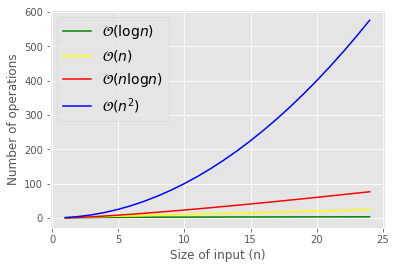

In [20]:
n = np.array(range(1, 25))
plt.plot(n, np.log(n), c='green')
plt.plot(n, n, c='yellow')
plt.plot(n, n*(np.log(n)), c='red')
plt.plot(n, n**2, c='blue')
plt.xlabel('Size of input (n)', fontsize=12)
plt.ylabel('Number of operations', fontsize=12)
plt.legend(['$\mathcal{O}(\log n)$', '$\mathcal{O}(n)$', '$\mathcal{O}(n \log n)$', '$\mathcal{O}(n^2)$', ], loc='best', fontsize=14);

***
# <center>Concept: Divide and Conquer</center>
<center>***Canonical Example***: Merge sort (see above)</center>

### Steps Involved
1. **Divide** problem into smaller subproblems


2. **Conquer** via set of recursive calls


3. **Combine** solutions of subproblems into one for the original problem

***
## The Problem: Counting Inversions

***Motivation***: Given an array containing n number in some arbitrary order, the number of ***inversions*** = the number of pairs $(i, j)$ of array indices with $i < j$ and $A[i] > A[j]$

* ***Why do we care?***: Inversions can be used to get a similarity score between two lists - fewer inversions indicates a better match


**Example**: Given array [1, 3, 5, 2, 4, 6]

* **Inversions**: (3,2), (5, 2), (5, 4)


### High-Level Algorithm:

In [ ]:
Sort_and_Count (array A, length n)
if n = 1, return 0
else: 
    B, x = Sort_and_Count (1st half of A, n/2)
    C, y = Sort_and_Count (2nd hald of A, n/2)
    D, z = Merge_and_CountSplitInv (A, n)  # Still need to implement
    
return x + y + z

***Goal***: Implement CountSplitInv in linear $O(n)$ time => Then, Count will run in $O(n*log(n))$ time


***Key Idea:*** Have recursive calls *both* count and sort

### Psuedo-code for Merge:

In [ ]:
D = output [length = n]  
B = 1st sorted array [n/2]  
C = 2nd sorted array [n/2]  
i, j = 0, 0

for k = 1 to n:
    if B(i) < C(j):
        D(k) = B(i)
        i++       
    else: # C(j) < B(i)
        D(k) = C(j)
        j++

### Example:

In [ ]:
Consider merging [1, 3, 5] and [2, 4, 6]

Output [1, 2]

... when 2 is copied to output, discover split inversion (3, 2) and (5, 2)

Output [1, 2, 3, 4]

... when 4 is copied to output, we discover split inversion (5, 4)

***General Claim***: The split inversions involving an element *y* of the 2nd array *C* are precisely the numbers left in the 1st array *B* when *y* is copied to the output *D*

### Proof:

***Statement:*** Let x be an element of the 1st array B

1. If x copied to the out D bfore y, then x < y => No inversion involving x & y


2. If y copied to the output D before x, then y < x => x & y are a split inversion

### Pseudo-code for Merge_and_CountSplitInv:

In [ ]:
1) While merging two sorted subarrays, keep running total of number of
split inversions

2) When element of 2nd array C gets copied to output D, increment count by
number of elements remaining in 1st array

***
## Real Code for Counting Inversions

***Motivation***: Python implementation for counting inversions

### Counting Inversions Algorithm:

In [21]:
inversion_count = 0

def sort_and_count(A):
    if len(A) <= 1:
        return A
    
    mid = len(A)//2
    return merge_and_count_split_inv(sort_and_count(A[:mid]), sort_and_count(A[mid:]))

def merge_and_count_split_inv(B, C):
    global inversion_count
    i, j = 0, 0
    Output = []

    while i < len(B) and j < len(C):
        if B[i] < C[j]:
            Output.append(B[i])
            i += 1
        else: # C[j] < B[i]
            Output.append(C[j])
            j += 1
            inversion_count += (len(B) - i) 

    Output += B[i:]
    Output += C[j:]

    return Output

In [22]:
A = [1, 3, 5, 2, 4, 6]
sort_and_count(a)

[1, 2, 3, 4, 5, 6]

In [23]:
inversion_count

3

***
# <center>Concept: The Master Method</center>

***Idea***: General mathematical tool for analyzing the running time of algorithms

### Motivating Example
* From Karatsuba Multiplication...


$$ x * y = 10^n(ac) + 10^{n/2}(ad+bc) + bd $$

* Computing 4 products, recursively... ***Master Method*** derivation to follow...

***
## Recurrences (Examples)

$T(n)$ = The maximum number of operations this algorithm needs to multiply two n-digit numbers (worst-case # operations)

* ***Recurence***: Express T(n) in terms for running time of recrusive calls

### 1) Simple Recursive Multiplication (4 recursive calls)

1. **Base Case**: $T(1)$ <= a constant


2. **General Case**: For all n > 1, $T(n) <= 4T(n/2) + O(n)$
    * First Term: Work done by recursive calls
    * Second Term: Work done outside of recursive calls

### 2) Gauss' Recursive Multiplication (3 Recursive calls)

* **Algorithm**: Recursively compute *ac, bd, (a+b)(c+d)*. Recall...

$$ ad + bc = (a+b)(c+d) = ac - bd $$


* **Recurence**

    1. ***Base Case***: $T(1)$ <= constant
    
    2. ***General Case***: $T(n) <= 3T^{n/2} + O(n)$

***
## The Master Method

***Cool Feature***: A "black box" for solving recurrences

* ***Assumption:*** All subproblems have equal size (say n/2 for example)

### Recurrence Format

1. ***Base Case***: For all problems we're going to look at, the base case can be thought of as:

$$ T(n) <= constant $$


2. ***For all larger n***:

$$ T(n) <= aT^{n/b} + O(n^d) $$

a = number of recursive calls (>= 1)  
b = input size shrinkage factor (> 1)   
d = exponent in running time of "combine step" (>= 0)  

***Note***:  a, b, d are all independent of n

### Formal Statement of Master Method

In [ ]:
        O(n^d log n)  if a = b^d

T(n) =  O(n^d)        if a < b^d 
     
        O(n^log_b(a))  if a > b^d

***
## Master Method Examples

### **1)  Merge Sort**

In [ ]:
a = 2
b = 2   =>  b^d = 2  =>  Case 2
d = 1

T(n) <= O(n^d log n) = O(n log n)

### 2) Binary Search

In [ ]:
a = 1
b = 2  =>  b^d = 1  =>  Case 1  
d = 0

T(n) <= O(n^d log n) = O(log n)

### 3) Integer Multiplication (Non-Gauss)

In [ ]:
a = 4
b = 2  =>  b^d = 2  =>  a > b^d  =>  Case 3
d = 1

T(n) <= O(n^logb(a)) = O(n^log_2(4)) = O(n^2)

### 4) Integer Multiplication (Gauss' Trick)

In [ ]:
a = 3
b = 2  =>  b^d = 2  =>  a > b^d  =>  Case 3  
d = 1

T(n) <= O(n^logb(a)) = O(n^log_2(3)) = O(n^1.58)

### 5) Strassen's Matrix Multiplication

In [ ]:
a = 7
b = 2
d = 2 (number of dimemsions of matrix)

b^d = 4 < a  =>  Case 3

T(n) <= O(n log_2(7)) = O(n^2.81)

### 6) Fictitious Recurrence

In [ ]:
T(n) <= 2T(n/2) + O(n^2)

a = 2
b = 2
d = 2

b^d = 4 > a  =>  Case 2

T(n) = O(n^2)

***
## Proof of Master Method

* ***Motivation***: Conceptual proof of Master Method - focusing on how recursion trees give us intutition into determining run time

### Work at a Single level:

1. **Total work at level j** (ignoring work in recursive calls)

$$ <= a^j * c * [n/b^j]^d = cn^d * [a/b^d]^j$$
 * $ a^j $ = # of level-j subproblems  
 * $ c * [n/b^j]^d $ = size of each level-j subproblem


2. **Summing over all levels** (j = 0,1,2 ... $log_b (n)$). Total work is...

$$ <= cn^d * \sum_{j=0}^{log_b(n)} [a/b^d]^j$$

***
# <center>Algorithm: QuickSort</center>

***Motivation***
* Very prevalent in practice
* Runs in $ O(n log(n)) $ time
* Requires minimal extra memory

***
## The Sorting Problem

**Input:** Array of n numbers, unsorted


**Output:** Same numbers, sorted in increasing order

**Assumption:** All array entries are distinct

***
## Partitioning Around a Pivot

***Key Idea:*** Partitioning an array around a pivot element

1. Pick an element of the array to act as *pivot*


2. Rearrange the array so that:

    * Left of the pivot - Less than pivot   
    * Right of the pivot - Greater than pivot  
    

***Note***: Once array is arranged around the pivot, the pivot will be in its 'rightful position'

In [ ]:
A = [3, 8, 2, 5, 1, 4, 7, 6] -> Choose 3 as pivot...

A = [2, 1, *3*, 6, 7, 4, 5, 8]

### Why Use Partitioning?

1. Partitioning can be implemented in linear $O(n)$ time - also requires no extra memory allocation (more to come on that later)


2. Reduced problem size - lends itself to divide & conquer

***
## Quicksort: High-Level Description

In [ ]:
QuickSort(array A, length n)
    if n = 1, return

    p = ChoosePivot(A, n)  # Currently unimplemented
    
    Partition A aroud p  -->   < p, p, > p
    
    Call QuickSort again to recursively sort 1st and 2nd parts

***
## Partitioning Subroutine

***Assume***: pivot = 1st element of the array. If not first element, swap pivot <-> 1st element as preprocessing step

### High-Level Idea

In [ ]:
| p |  <p   |  >p   |     ?       |    p = partition

- Everything looked at so far is partitioned
- Everything we have not looked at is not partitioned

### Example

In [ ]:
| p |  <p   |  >p   |     ?       |    p = partition

            i       j
    
i: boundary between >/< pivot
j: boundary between partitioned/unpartitioned

### Pseudocode

In [ ]:
Partition(A, l, r)     input = A[l .... r]

p = A[l]
i = l+1

for j = l+1 to r:
    if A[j] < p:  # Note if A[j] > p, do nothing (don't need to swap)
        Swap A[j] and A[i]
        i++

### Running Time

**Running Time** = $O(n)$ where $n = r - l + 1

* Reason - $O(1)$ work per array entry

**Also**: Clearly works in place (repeated swaps)

***
## Choose Pivot Subroutine

***The Importance of the Pivot***

* The runtime depends crucially on the quality of the pivot chosen

    1. Choose the worst pivot - the first element of an ordered list 

        * Runtime: $O(n^2)$  
        
    2. Choose the best pivot - the middle-most value of the list  
        * Runtime: $O(n log(n))$


***Key Question***

* How to choose pivots?


***Big Idea***

* Random pivots!


* In every recursive call, <u>choose the pivot randomly</u>

***
## Analyzing QuickSort

***Note***: Can't apply the Master Method - we have random, unbalanced subproblems


**Upshot**: See the videos for all the gory details... but, the idea is the running time of Quicksort is dominated by the number of comparisons it makes, yielding an overall running time that is:

$$ O(n * log(n)) $$

***
# <center>Algorithm: Randomized Selection [(QuickSelect)](https://en.wikipedia.org/wiki/Quickselect)</center>

### Motivation ###


* ***Input***: Array A with n distinct numbers and a number i in {1, 2, ..., n}


* ***Output***: $i^{th}$ order statistic - that is, the $i^{th}$ smallest element of the input array.

**Reduction to Sorting** - We already have a good way to solve this in $O(n * log(n))$ time...

1. Apply MergeSort  
2. Return $i^{th}$ element of the array  
3. Done!


**Fact**: We want a linear time $O(n)$ solution, ***but*** sorting can't be done any faster the quadratic time, so MergeSort isn't going to get us there...

***
## The Selection Problem - Using Pivots

***<u>Motivation</u>***: Just as in Quicksort, we'll use a partitioning subroutine to order the array.

### Psuedo-code 

In [ ]:
RSelect(array A, length n, order_statistic i):
    1. if n = 1 return A[1]

    2. choose pivot p from A uniformly at random
    
    3. partition around p
       let j = new index of p

    4. if j == i, return p # Got lucky and choose the ith element

    5. if j > i return RSelect(1st part of A, j - 1, i)

    6. if j < i return RSelect(2nd part of A, n-j, i-j)    

### Real Code for RSelect

In [24]:
import random

def quick_select(A, left, right, i):
    if right - left <= 1:
        return A[left]

    pivot_location = partition(A, left, right)
    if pivot_location == i:
        return A[pivot_location]
    if pivot_location > i:
        return quick_select(A, left, pivot_location, i)
    if pivot_location < i:
        return quick_select(A, pivot_location+1, right, i - pivot_location)

def partition(A, left, right):
    rand_index = random.randint(left, right-1)
    pivot = A[rand_index]
    swap(A, left, rand_index)

    i = left + 1
    for j in range(i, right):
        if A[j] < pivot:
            swap(A, i, j)
            i += 1
    
    swap(A, left, i-1)
    return i-1


def swap(A, first, second):
    A[first], A[second] = A[second], A[first]

In [25]:
A = [18, 20, 17, 5, 16]
quick_select(A, 0, len(A), 2)

17

***
## Properties of Rselect

* **<u>Claim</u>**: RSelect is correct (guaranteed to output $i^{th}$ order statistic) - proof by induction if you're keen


* **<u>Running Time</u>**: How quickly will this run?

    * The worst-case (highly unlikely): $O(n^2)$

    * Depends on which pivot gets chosen

### Best Case Running Time

* ***<u>Key</u>***: Find the pivot giving the most balanced split


* ***<u>Best Pivot?</u>***: The median!!

In [ ]:
Would get recurrence of:

T(n) <= T(n/2) + O(n)  ==>  T(n) = (n)  ==>  Case 2 of the Master Method

### The Hope...

* **<u>RSelect Theorem</u>**: For every input array of length n, the average running time of RSelect is $O(n)$

    - Holds for every input
    
    - "average" is over random pivot choices made by the algorithm

***
# <center>Data Structure: Graph</center>


***<u>Definition</u>:*** Represents pair-wise relationships between objects


### Two Ingredients:

1. **Vertices (V)** - also known as nodes

2. **Edges (E)** - pairs of edges


### Types of Graphs

1. **Undirected** - unordered pairs

2. **Directed** - ordered pairs... there's a first, etc...


### Examples - why use Graphs?

1. **Road networks** - manipulates data stored as a graph to give best route

2. **The web** - vertices are webpages, edges are hyperlinks. Directed graph.

3. **Social Networks** - vertices are individuals, edges are relationships. Some networks are directed, others not.

4. **Precedence constraints** - Course sequences, which preceeds what - captures temporal aspect of putting together a course plan.

***
## Cuts of Graphs

***<u>Definition</u>***: A cut of a graph (V, E) is a partition of V into two non-empty sets, A and B.

* **Note**: There are $2^n$ ways to cut a group of *n* nodes


### What are we interested in?

***<u>Crossing Edges</u>***: The crossing edges of a cut (A, B) are those with...

1. One endpoint in each of A, B (if undirected)
2. Tail in A, head in B (for directed cuts) - *only* counting edges that go from left to right


### The Minimum Cut Problem

***<u>Input</u>***: An undirected graph G = (V, E) - Parallel edges area allowed


***<u>Goal</u>***: Compute a cut with the fewest number of crossing edges (a min cut) 


### Applications of Min Cut

1. Identify weaknesses/bottlenecks in a network
2. Community detection in social networks - Looking for interconnected regions that are strongly connected amongst themselves, but weakly connected outside of that.
3. Image segmentation - Input is a graph of pixels; using edge weigthing to identify primary objects in a picture

***
## Graph Representations

***<u>Notation</u>***: Let n = # of vertices, m = # of edges

1. The fewest number of edges, m, is $n - 1$
2. The upper bound for number of edges, m, is $n(n-1)/2$


### Sparse vs Dense Graphs

**<u>Sparse</u>**: In a sparse graph, m is O(n) or close to it

**<u>Dense</u>**: In a dense graph, m is closer to O(n^2)

### The Adjacency Matrix

***<u>Definition</u>***: Represent graph by an n x n matrix, A, where $A_{ij} = 1 <=>$ G has an i-j edge

***<u>Variants</u>***:

1. $A_{ij}$ = # of i-j edges (if parallel edges)
2. $A_{ij}$ = *weight* of i-j edge (if any)
3. $A_{ij}$ = +1/-1 to denote direction in a directed graph

***<u>Space Requirements</u>***

* Matrix will require at most $O(n^2)$ space - Note this is fine for a dense graph, but super wasteful for a sparse graph

### Adjacency Lists

***<u>Ingredients</u>***

1. Array of vertices
2. Array of edges
3. Each edge points to its endpoints
4. Each vertex points to edges incident on it

***<u>Space Requirements</u>***

* The list representation of a graph will use $O(m + n)$ space

**List vs Matrix** - Which is better? Depends on graph density and operations needed.

* ***This course*** - We'll focus on adjacency lists. Better for *graph search*

### Upshot

* If looking at huge data sets, an *adjacency matrix* might require more space than can reasonably be allocationed $O(n^2)$ - in this case you're pretty much bound to an *adjacency list*

***
# <center>Algorithm: Random Contraction (Graphs)</center>


### Pseudo-code (Basic Idea)

In [ ]:
While there are more than 2 vertices:
    
    - Pick a remaining edge  (u, v) uniformly at random
    
    - Merge (or "contract") u and v into a single vertex
    
    - Remove self-loops
    
Return cut represented by final 2 vertices

### Example

![Graph Random Contraction](images/graph_random_contraction.png)


**Note**: This algorithm is random; it will *not* always give you the exact min cut count. In the above example it did, but won't always...

**Question**: What's the probability of success??

* Analysis shows the probability of success is $1/n^2$. Wait, what? Isn't that bad?

* It is, but... we have a way to improve it.

***<u>Solution</u>***: Run the basic algorithm N times and remember the smallest cut found

* How many trials are needed?

    * A lot - $n^2$
    
    
* Running Time? Overall this method will run in $O(n^2*m)$, but there are things that can be done to reduce it (outside the scope of this class)



***
# <center>Concept: Graph Search</center>

***<u>Motivation (Examples)</u>***

1. Check if a (physical) **network** is connected - can get to anywhere from anywhere


2. **Movie network** - "Bacon number" - degrees away from Kevin Bacon


3. **Driving Directions** - Shortest path (time or distance)


4. **Formulating a plan** - For example, filling in a sedoku puzzle
    * Nodes = partially completed puzzle (starting point)
    

5. **Structure of the web** 

***
## Generic Graph Search

***<u>Goals</u>***

1. Find everything 'findable' from a given starting vertex

2. Don't explore anything twice -> Goal is $O(m + n)$


***<u>Generic Algorithm</u>***: Given graph $g$, vertex $s$

* Initially s is explored, all other vertices unexplored


* *While possible*: 
    * Choose an edge (u, v) with u explored and v unexplored (if none, halt)
    * Mark v as explored
    
    
***<u>Claim</u>***: At the end of the algorithm, v is explored iff G has a path from s to v

***
## Search Types: Breadth-First or Depth-First

***<u>Breadth-First Search (BFS)</u>***
* 'Conservative' search - Explore nodes in 'layers'
* Can compute shortest paths (using layers)
* Can compute connected components of *undirected* graphs
* Will use a **queue** (FIFO) to get linear $O(m + n)$ time


***<u>Depth-First Search (DFS)</u>***
* Explore aggressively like a maze - backtrack only when necessary
* Not best for shortest path
* Compute topological ordering of a directed acyclic graph
* Compute connected components in *directed* graphs
* Will use a **stack** (LIFO) to get linear $O(m + n)$ time


![Graph Search](images/graph_search.png)

***
# <center>Algorithm: Breadth-First Search</center>

***<u>Breadth-First Search (BFS)</u>***
* Explore nodes in 'layers'
* Great for computing shortest paths
* Connected components of undirected graphs

***<u>Run Time</u>***: $O(m + n)$ - linear time

![BFS](images/bfs.png)

## Psudeo-code

In [ ]:
BFS(graph G, starting_vertex s)  # All nodes initially unexplored

    - Mark s as explored
    
    - Let Q = queue data structure (FIFO), initialized with s
    
    - While Q != empty 
        Remove the first node of Q, call it v
        For each edge (v, w):
            if w unexplored:
                mark w as explored
                add w to Q (at the end)

![BFS Code](images/bfs_code.png)


***Note***: Using a queue to keep track of nodes visited

***<u>Run Time</u>***: Running time of main while loop is $O(n_s + m_s)$

* $n_s$ = number of nodes reachable from s
* $m_s$ = number of edges reachable from s

***
## Application:  Shortest Paths

***<u>Goal</u>***: Compute dist(v), the fewest # of edges on a path from s to v

**<u>Extra Code</u>**

In [ ]:
Initialize dist(v) = 0 if v = s
                   = infinity if v != s
    
When considering edge (v, w):
    # Distance is 1 more than the vertex responsible for finding it
    if w unexplored, the set dist(w) = dist(v) + 1

![BFS Shortest Path](images/bfs_shortest_path.png)

**<u>Claim</u>**: At termination, dist(v) = i if and only if v is in the $i^{th}$ layer

***
## Application:  Undirected Connectivity

***<u>Motivation</u>***:  Let G = (V, E) be an undirected graph. Compute all connected components

1. Check if a network is disconnected - graph connected or not?
2. Graph visualization for network data
3. Clustering - grouping similar objects

![Undirected Graph](images/undirected_graph.png)


***<u>Connected Components</u>***: the 'pieces' of G

### To Compute all Components

In [ ]:
Mark all nodes as unexplored - assume nodes labled 1 to n

for i = 1 to n:
    if i not yet explored:
        BFS (G, i)  # Discovers i's connected components

***<u>Note</u>***: Finds every connected component

***<u>Running Time</u>***: O(m + n)

***
# <center>Algorithm: Depth-First Search</center>

***<u>Depth-First Search (DFS)</u>***
* Explore aggressively, only backtrack when necessary
* Computes a topological ordering of a directed acyclic graph
* Computes strongly connected components of directed graphs

***<u>Run Time</u>***: $O(m + n)$ - linear time

![DFS](images/dfs.png)

## Psuedo-code

***<u>Exercise</u>***: Mimic BFS code, use a stack instead of a queue (plus other minor modifications)

**<u>Recursive Version</u>**

In [ ]:
DFS(graph G, start_vertex s)

    mark s as exploredkos
    
    for every edge (s, v):
        if v unexplored:
            DFS(G, v)

***<u>Run Time</u>***: Running time of main while loop is $O(n_s + m_s)$

* $n_s$ = number of nodes reachable from s
* $m_s$ = number of edges reachable from s

***<u>Note</u>***: Look at each node in connected component of s at most once, each edge at most twice

***
## Application: Topological Sort

***<u>Definition</u>***: A **topological ordering** of a directed graph G is a labelling f of G's nodes such that:

1. the f(v)'s are the set of {1, 2, ... ,n}
2. (u, v) in set G if and only if f(u) < f(v)

![Topo Sort](images/topo_sort.png)


***<u>Motivation</u>***: Sequencing tasks while respecting all precedence constraints


***<u>Notes</u>*** 

* If G is a directed cycle, it cannot be topologically sorted

* Every directed acyclic graph has a sink vertex

### Straight-forward Solution

In [ ]:
Let v be a sink vertex of G
set f(v) = n
recurse on G - {v}

### Topo Sort via DFS (slicker solution)

In [ ]:
DFS(graph G, start_vertex s)

    mark s as explored
    
    for every edge (s, v):
        if v unexplored:
            DFS(G, v)
    
    set f(s) = current_label
    current_label --


DFS_Loop(graph G)

    mark all nodes unexplored
    
    current_label = n # To keep track of ordering
    
    for each vertex (v in G):
        if v unexplored:
            DFS(G, v)

***<u>Run Time</u>***: O(m + n) --> O(1) time per node, O(1) time per edge

***
# <center>Algorithm: Strongly Connected Components (Graphs)</center>

***<u>Definition</u>***: A **Strongly Connect Component (SCC)** is a connected graph where it's possible to get from any one point to any other point within the graph.


***<u>Depth-First Search (DFS)</u>***: If called from the right place, will give you all the SCC's, otherwise, it won't give you any useful info at all. So what do we do? ... 


![SCC](images/scc.png)

***[Kosaraju's Algorithm](https://en.wikipedia.org/wiki/Kosaraju%27s_algorithm)***: This is the algorithm used to compute SCC's

![Kosaraju](images/kosaraju.png)